In [93]:
!pip3 install requests beautifulsoup4 nltk pandas selenium




[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
#I created a dataset using the Hoffman Institute’s mood resource (https://www.hoffmaninstitute.org/wp-content/uploads/Practices-FeelingsSensations.pdf) and added extra sections.
# The dataset lists feelings in three categories: positive, negative, and neutral. Each word has a short description.
# It's a starting point for understanding emotions and not a complete list. Emotions are personal, and this helps people explore their own.
# The dataset also includes fun descriptions of clothing and remarks linked to certain moods, meant to be humorous.
# It's currently based on womens clothing, in the future I will add mens clothing and other categories.
# The dataset is a work in progress, and I plan to add more words and categories over time.

In [95]:
import pandas as pd


data = {
    "Mood": [
        "Happy", "Sad", "Confident", "Energetic", "Calm", "Chill", "Romantic", "Playful", "Bold", "Glamorous", 
        "Adventurous", "Sophisticated", "Edgy", "Chic", "Comfortable", "Mystical", "Excited", "Sexy", "Rebellious", 
        "Confused", "Proud", "Flirty", "Focused", "Caring", "Curious", "Grumpy", "Energetic", "Nostalgic", "Mellow", 
        "Joyful"
    ],
    "StyleTrend": [
        "Bright Colours", "Oversized Sweaters", "Power Dressing", "Athletic Vibes", "Minimalist", 
        "Casual", "Flowing Dresses", "Bold Prints", "Edgy Accessories", "Evening Wear", 
        "Outdoor Clothing", "Luxury Fashion", "Grunge-Inspired", "Tailored Suits", "Loungewear", 
        "Bohemian Vibes", "Neon Brights", "Figure-Hugging Outfits", "Vintage Clothing", 
        "Casual Chic", "Bold Slogans", "Cute Skirts", "Tailored Suits", "Earth Tones", "Mixing Patterns", 
        "Dark Tones", "Sporty Looks", "Retro-Inspired", "Soft Pastels", "Simple Yet Stylish"
    ],
    "Description": [
        "Vibrant colours, playful patterns, and happy vibes.",
        "Comfy oversized sweaters, leggings, and cozy footwear.",
        "Tailored blazers, sharp trousers, and statement jewellery.",
        "Athleisure, comfortable joggers, and sporty sneakers.",
        "Neutral tones, clean lines, and minimalist aesthetics.",
        "Casual, airy clothing that promotes relaxation.",
        "Soft fabrics, delicate floral prints, and romantic silhouettes.",
        "Bold patterns and colours, with fun accessories.",
        "Leather jackets, bold boots, and edgy styling.",
        "Glamorous evening gowns, sequins, and luxury accessories.",
        "Rugged outdoor clothing for adventurous activities.",
        "Clean lines, high-end fabrics, and sophistication.",
        "Dark colours, layered clothing, and edgy accessories.",
        "Tailored suits, modern silhouettes, and sleek designs.",
        "Comfortable and stylish loungewear for a relaxed vibe.",
        "Flowy layers, loose silhouettes, and dreamy colours.",
        "Bright neon, bold patterns, and statement accessories.",
        "Tight, figure-flattering dresses, and sleek heels.",
        "Vintage clothing with a rebellious twist, ripped jeans.",
        "Comfy clothing, mismatched for a relaxed vibe.",
        "T-shirts with empowering slogans, and graphic designs.",
        "Fun, flirty skirts and tops, with delicate accessories.",
        "Sharp tailored suits, professional accessories, and smart shoes.",
        "Earthy colours, eco-friendly materials, and soft textures.",
        "Mixing and matching bold patterns for an experimental look.",
        "Dark tones, oversized clothing for a laid-back vibe.",
        "Sporty looks with a mix of casual and athletic pieces.",
        "Retro vintage-inspired looks, and quirky patterns.",
        "Soft pastel colours, and airy, relaxed outfits.",
        "Simple and stylish pieces for an effortlessly chic vibe."
    ],
    "SassyComment": [
        "Shine bright like the star you are! ✨🌞",
        "Comfy chic, darling. Let’s make it a cozy day. 🛋️",
        "Power moves only. You’re ready to conquer! 👑🔥",
        "Get moving, babe. You’re unstoppable! 💥",
        "Less is more, darling. Embrace simplicity. 🌿",
        "Chill vibes only. Relax and look fabulous. 😌",
        "You’re a dream in that dress! 🌹",
        "Go bold or go home, gorgeous! 💅",
        "Make a statement, darling. Rock that edgy style! ⚡",
        "You own the night in that glam outfit! ✨",
        "Adventure awaits! Get ready for the outdoors. 🌲",
        "Elegance is key. You were born for luxury. 💎",
        "Grunge it up, babe. Be edgy and cool. 🖤",
        "Chic and sleek, darling. You’ve got this. ✨",
        "Comfy, cozy, and chic. Perfect for lounging. 😴",
        "Let your boho spirit fly free! 🌙",
        "Turn heads in neon, babe. The world’s your runway! 🌟",
        "Show them what confidence looks like, darling. 💋",
        "Vintage vibes, let’s go rebellious! ✌️",
        "Mismatched? Who cares. You’re fabulous anyway! 😎",
        "Stand tall in that slogan tee. Own your truth! 💪",
        "Flirt with the world, darling. You’ve got the charm! 💕",
        "Focus and slay, boss. You’re unstoppable! 👔",
        "Eco-chic! Save the planet in style. 🌍",
        "Mix it up, make it pop! Fashion’s your playground. 🎨",
        "Dark and moody, but oh so cool. 🖤",
        "Run, jump, and look fab. Athleisure goals! 👟",
        "Back in time, babe. Retro is the new now! 🎶",
        "Pastels make everything softer. You look angelic! 🌸",
        "You’ve got the look! Effortless style at its finest. 😎"
    ],
    "Emoji": [
        "🌞✨💅", "🧣🛋️", "👑🔥💃", "💥👟", "🌿🤍", 
        "😌🌸", "🌹💫", "💅🌈", "⚡👢", "✨💖", 
        "🌲🗺️", "💎👗", "🖤🎧", "✨💁‍♀️", "😴🛏️", 
        "🌙🌻", "🌟💫", "👠🔥", "🎸🎤", "🌿🌎", 
        "🎨💥", "🖤🌘", "👟💨", "🎶🕺", "🌸💖", 
        "💁‍♀️💋", "✨💎", "🌼☀️", "🎯🏅", "💥⚡"
    ]
}

# Check the lengths of each list to ensure they're the same
for key, value in data.items():
    print(f"{key}: {len(value)}")

# Create the DataFrame
df = pd.DataFrame(data)

# Save the dataframe to CSV for future use
df.to_csv("expanded_mood_fashion_trends.csv", index=False)

# Show the first few rows of the expanded dataframe
df.head()


Mood: 30
StyleTrend: 30
Description: 30
SassyComment: 30
Emoji: 30


,Mood,StyleTrend,Description,SassyComment,Emoji
0,Happy,Bright Colours,"Vibrant colours, playful patterns, and happy v...",Shine bright like the star you are! ✨🌞,🌞✨💅
1,Sad,Oversized Sweaters,"Comfy oversized sweaters, leggings, and cozy f...","Comfy chic, darling. Let’s make it a cozy day. 🛋️",🧣🛋️
2,Confident,Power Dressing,"Tailored blazers, sharp trousers, and statemen...",Power moves only. You’re ready to conquer! 👑🔥,👑🔥💃
3,Energetic,Athletic Vibes,"Athleisure, comfortable joggers, and sporty sn...","Get moving, babe. You’re unstoppable! 💥",💥👟
4,Calm,Minimalist,"Neutral tones, clean lines, and minimalist aes...","Less is more, darling. Embrace simplicity. 🌿",🌿🤍


In [96]:
# I used the requests library to get the HTML content of the page and then parsed it with BeautifulSoup. I extracted the relevant data and stored it in a pandas DataFrame. The data includes style trend information from spring 2025, description for each item. The DataFrame is then saved to a CSV file. 

In [97]:
import requests
from bs4 import BeautifulSoup
import csv
import datetime

url = "https://www.midlifechic.com/spring-fashion-trends-2025-the-most-wearable/"
output_filename = "Fashion trends 2025.csv"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36'
}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the main article container using its ID
    article_element = soup.find('article', id='post-21656')

    if article_element:
        # Find all paragraph tags within the article element
        paragraphs = article_element.find_all('p')
        article_text = "\n".join([p.get_text(strip=True) for p in paragraphs])

        with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow(['URL', 'Content', 'Scraped Date'])
            scraped_date = datetime.date.today().isoformat()
            csv_writer.writerow([url, article_text, scraped_date])

        print(f"Successfully scraped content from '{url}' and saved to '{output_filename}'")

    else:
        print(f"Could not find the main article body on '{url}'")

except requests.exceptions.RequestException as e:
    print(f"Error fetching '{url}': {e}")
except Exception as e:
    print(f"Error parsing '{url}': {e}")

Successfully scraped content from 'https://www.midlifechic.com/spring-fashion-trends-2025-the-most-wearable/' and saved to 'Fashion trends 2025.csv'


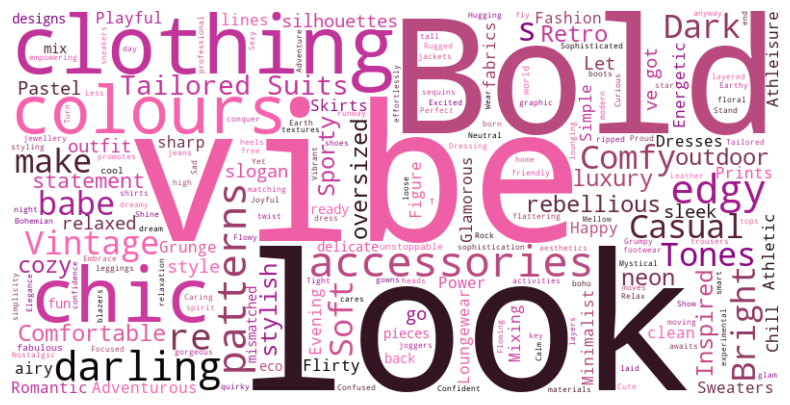

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

# Load your dataset (replace 'expanded_mood_fashion_trends.csv' with your actual file path)
df = pd.read_csv("Mood_fashion_trends.csv")

# Combine the text from the relevant columns (e.g., 'Mood', 'StyleTrend', 'Description', 'SassyComment')
text = " ".join(df["Mood"].dropna()) + " " + " ".join(df["StyleTrend"].dropna()) + " " + " ".join(df["Description"].dropna()) + " " + " ".join(df["SassyComment"].dropna())

# Custom colormap for black, pink, and purple
custom_cmap = LinearSegmentedColormap.from_list('black_pink_purple', [(0, 'black'), (0.5, '#ff66b2'), (1, '#800080')])

# Generate the word cloud with black, pink, and purple
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_cmap).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Different colours for python, library matplotlib https://matplotlib.org/stable/gallery/color/named_colors.html

In [ ]:
# I am now doing colour pyschology and find data based on what colour moods are associated with. I will use the data to create a word cloud based on the colours and moods. I am creating a dataset using information from articles, pdf and papers, I done research on.# I will use the data to create a word cloud based on the colours and moods.

In [ ]:
import pandas as pd

# Define your data as a dictionary
data = {
    "Color": [
        "Red", "Blue", "Yellow", "Green", "Purple", "Orange", "Pink", "Black", "White", "Brown", 
        "Grey", "Indigo", "Aqua", "Violet", "Gold", "Silver", "Teal", "Maroon", "Lavender", "Coral",
        "Peach", "Mint", "Salmon", "Tan", "Khaki", "Burgundy", "Charcoal", "Lemon", "Periwinkle"
    ],
    "Hex Code": [
        "#FF0000", "#0000FF", "#FFFF00", "#00FF00", "#800080", "#FFA500", "#FFC0CB", "#000000", "#FFFFFF", "#A52A2A",
        "#808080", "#4B0082", "#00FFFF", "#EE82EE", "#FFD700", "#C0C0C0", "#008080", "#800000", "#E6E6FA", "#FF7F50",
        "#FFDAB9", "#98FF98", "#FA8072", "#D2B48C", "#F0E68C", "#800020", "#36454F", "#FFF700", "#CCCCFF"
    ],
    "Emotion": [
        "Passion, Energy", "Calm, Trustworthy", "Happiness, Optimism", "Balance, Growth", "Luxury, Creativity", "Warmth, Enthusiasm", 
        "Compassion, Love", "Power, Sophistication", "Purity, Peace", "Stability, Comfort", "Neutrality, Calm", "Intuition, Wisdom", 
        "Clarity, Healing", "Spiritual, Romantic", "Luxury, Wealth", "Modern, Futuristic", "Balance, Serenity", "Strength, Courage", 
        "Relaxation, Calm", "Warmth, Joy", "Serenity, Calmness", "Freshness, Vitality", "Comfort, Warmth", "Stability, Simplicity", 
        "Neutrality, Peace", "Power, Confidence", "Strength, Authority", "Cheerfulness, Fun", "Calm, Peaceful"
    ],
    "Fashion Trend": [
        "Bold Fashion", "Casual Chic", "Summer Vibes", "Eco-friendly Fashion", "Elegant Evening Wear", "Boho Chic", "Feminine Fashion", 
        "Classic Elegance", "Minimalist Fashion", "Autumn Wear", "Professional Wear", "Intellectual Fashion", "Resort Wear", "Vintage Fashion", 
        "Evening Wear", "Metallic Fashion", "Coastal Wear", "Power Dressing", "Soft Chic", "Summer Dresses", "Casual Summer Wear", 
        "Spring Fashion", "Casual Fashion", "Earthy Fashion", "Military Inspired Fashion", "Luxe Fashion", "Professional Style", "Casual Daywear", 
        "Soft Fashion"
    ],
    "Mood description": [
        "Fiery, Intense", "Relaxed, Peaceful", "Bright, Joyful", "Fresh, Restful", "Regal, Creative", "Vibrant, Fun", "Soft, Gentle", 
        "Strong, Mysterious", "Calm, Neutral", "Warm, Earthy", "Balanced, Cool", "Deep, Focused", "Fresh, Soothing", "Dreamy, Elegant", 
        "Opulent, Glamorous", "Sleek, Techy", "Peaceful, Calm", "Bold, Assertive", "Tranquil, Restful", "Playful, Warm", "Soft, Gentle", 
        "Light, Uplifting", "Cozy, Homely", "Relaxed, Soothing", "Subtle, Strong", "Deep, Confident", "Serious, Commanding", "Bright, Lively", 
        "Gentle, Relaxing"
    ],
    "Icon": [
        "Iris Law", "Meghan Markle", "Beyonce", "Emma Watson", "Zendaya", "Kylie Jenner", "Ariana Grande", "Victoria Beckham", 
        "Bella Hadid", "Oprah Winfrey", "Zoe Kravitz", "Natalie Portman", "Selena Gomez", "Lady Gaga", "Kim Kardashian", "Nara Smith", 
        "Blake Lively", "Serena Williams", "Emma Stone", "Taylor Swift", "Scarlett Johansson", "Lily Collins", "Jessica Alba", 
        "Billie Eilish", "Kate Moss", "Rihanna", "Naomi Campbell", "Zendaya", "Blake Lively"
    ],
        "Mood": [
        "Happy", "Sad", "Confident", "Energetic", "Calm", "Chill", "Romantic", "Playful", "Bold", "Glamorous",
        "Adventurous", "Sophisticated", "Edgy", "Chic", "Comfortable", "Mystical", "Excited", "Sexy", "Rebellious", 
        "Confused", "Proud", "Flirty", "Focused", "Caring", "Curious", "Grumpy", "Energetic", "Nostalgic", "Mellow"
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("colour_psychology_mood.csv", index=False)
print("✅ Dataset saved!")


✅ Dataset saved!


In [135]:
import random

def build_markov_chain(text):
    words = text.split()
    markov_chain = {}
    for i in range(len(words) - 1):
        if words[i] not in markov_chain:
            markov_chain[words[i]] = []
        markov_chain[words[i]].append(words[i + 1])
    return markov_chain

def generate_text(markov_chain, start_word, length=50):
    word = start_word
    text = word
    for _ in range(length):
        if word not in markov_chain:
            break
        next_word = random.choice(markov_chain[word])
        text += ' ' + next_word
        word = next_word
    return text

# Example usage
with open('Mood_fashion_trends.csv', 'r', encoding='utf-8') as file:
    data = file.read()

# Assume you're using the 'Description' column
descriptions = " ".join([line.split(',')[2] for line in data.splitlines()])

markov_chain = build_markov_chain(descriptions)
print(generate_text(markov_chain, 'Vibrant'))


Vibrant


Index(['Color', 'Hex Code', 'Emotion', 'Fashion Trend', 'Mood description',
       'Icon', 'Mood'],
      dtype='object')


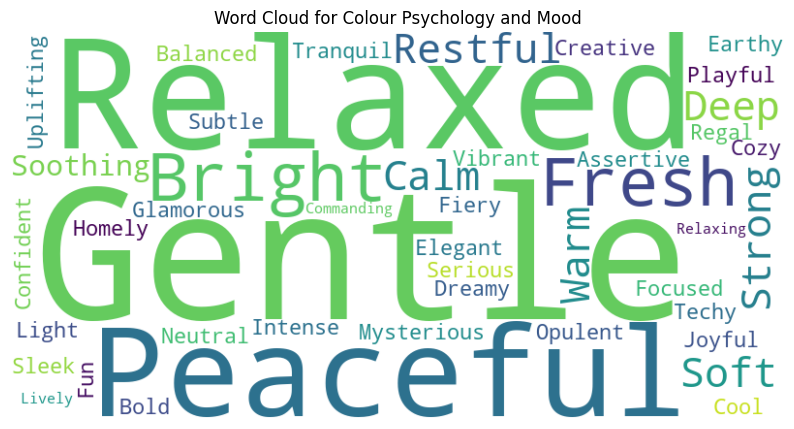

In [141]:
df = pd.read_csv('Colour_psychology_mood.csv')

# Check the columns to see where the relevant text is (assuming 'Description' or 'SassyComment' exists)
print(df.columns)

# Concatenate all the text in the relevant column(s)
# Assuming 'Description' contains the text data you want
# Check if the 'Mood description' column exists in the DataFrame
if 'Mood description' in df.columns:
	text = " ".join(df['Mood description'].dropna())
else:
	raise KeyError("The column 'Mood description' does not exist in the DataFrame.")

# Create and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Colour Psychology and Mood')
plt.show()


In [152]:
import pandas as pd

# Load the datasets
dataset1 = pd.read_csv("Colour_Psychology_mood.csv")
dataset2 = pd.read_csv("Mood_fashion_trends.csv")

# Merge the datasets on the 'Mood' column
merged_data = pd.merge(dataset1, dataset2, on="Mood")

# Save the merged dataset to a new CSV file
merged_data.to_csv("Merged_Colour_Psychology_Mood_Fashion.csv", index=False)

# Confirmation message
print("Datasets merged and saved as 'Merged_Colour_Psychology_Mood_Fashion.csv'.")



Datasets merged and saved as 'Merged_Colour_Psychology_Mood_Fashion.csv'.


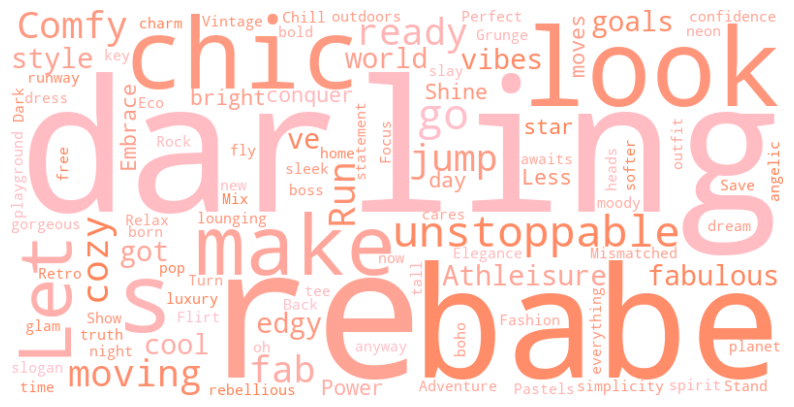

In [162]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Combine all descriptions or sassy comments
text = " ".join(merged_data['SassyComment'].dropna())

# Create a custom colormap with pink and orange colours
pink_orange_colors = ["#FFC0CB", "#FF7F50"]  # Pink and Orange hex codes
cmap = mcolors.LinearSegmentedColormap.from_list("pink_orange", pink_orange_colors)

# Generate and display the word cloud with the custom colormap
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cmap).generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes for the word cloud
plt.show()





In [165]:
!pip3 install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------------- ------------------------- 3.9/11.1 MB 23.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.1 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 23.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [171]:
import pandas as pd

# Load the dataset
fashion_data = pd.read_csv('Fashion_review_sales.csv')


In [172]:
# Check the first 5 rows
print(fashion_data.head())

# Get more detailed information about the dataset
print(fashion_data.info())

# Check for missing or null values
print(fashion_data.isnull().sum())

# Summary statistics
print(fashion_data.describe())


  Product Name      Price              Brand   Category Description    Rating  \
0         T5D3  97.509966       Ralph Lauren   Footwear         Bad  1.421706   
1         Y0V7  52.341277          Ted Baker       Tops    Not Good  1.037677   
2         N9Q4  15.430975             Jigsaw   Footwear    Very Bad  3.967106   
3         V2T6  81.116542  Alexander McQueen  Outerwear    Not Good  2.844659   
4         S7Y1  31.633686     Tommy Hilfiger    Bottoms   Very Good  1.183242   

   Review Count Style Attributes Total Sizes Available Sizes  Color  \
0           492       Streetwear    M, L, XL              XL  Green   
1            57          Vintage    M, L, XL              XL  Black   
2           197       Streetwear     S, M, L               M   Blue   
3           473           Formal     S, M, L               L    Red   
4            55           Sporty    M, L, XL               S  Green   

  Purchase History  Age Fashion Magazines Fashion Influencers       Season  \
0       

In [184]:
# I am cleaning data with duplicates, prices, colours, dates and categories. I am using pandas to do this. I will also check for missing values and remove them. 
fashion_data = fashion_data.drop_duplicates()
fashion_data = fashion_data.dropna()

if 'price' in fashion_data.columns:
	# For numerical columns
	fashion_data['price'] = fashion_data['price'].fillna(fashion_data['price'].mean())
	# Convert 'price' column to numeric (if it was stored as a string)
	fashion_data['price'] = pd.to_numeric(fashion_data['price'], errors='coerce')

if 'colour' in fashion_data.columns:
	# For categorical columns (e.g., colour, brand)
	fashion_data['colour'] = fashion_data['colour'].fillna('Unknown')
	# Convert all text in the 'colour' column to lowercase
	fashion_data['colour'] = fashion_data['colour'].str.lower()

if 'date' in fashion_data.columns:
	# Convert date column to datetime format (if present)
	fashion_data['date'] = pd.to_datetime(fashion_data['date'], errors='coerce')

if 'category' in fashion_data.columns:
	# Remove leading and trailing spaces
	fashion_data['category'] = fashion_data['category'].str.strip()
	
fashion_data.to_csv('Cleaned_fashion_data.csv', index=False)
print("Data cleaning completed and saved to 'cleaned_fashion_data.csv'.")

Data cleaning completed and saved to 'cleaned_fashion_data.csv'.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Print column names as a list
print(list(fashion_data.columns))


['Product Name', 'Price', 'Brand', 'Category', 'Description', 'Rating', 'Review Count', 'Style Attributes', 'Total Sizes', 'Available Sizes', 'Color', 'Purchase History', 'Age', 'Fashion Magazines', 'Fashion Influencers', 'Season', 'Time Period Highest Purchase', 'Customer Reviews', 'Social Media Comments', 'feedback']


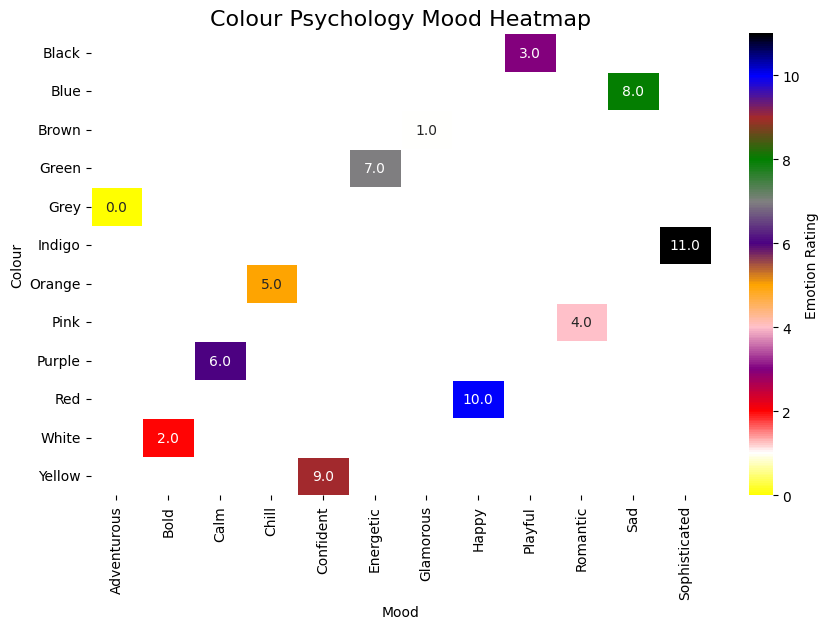

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the dataset (replace with the actual file path)
colour_psychology_data = pd.read_csv('Colour_psychology_mood.csv')

# Subset the first 12 rows of the dataset
subset_data = colour_psychology_data.head(12)

# Clean the data if necessary (e.g., drop missing values)
subset_data = subset_data.dropna()  # Drop rows with missing values, if necessary

# Map the Emotion strings to numerical values (e.g., using a dictionary)
emotion_mapping = {
	"Passion, Energy": 10, "Calm, Trustworthy": 8, "Happiness, Optimism": 9,
	"Balance, Growth": 7, "Luxury, Creativity": 6, "Warmth, Enthusiasm": 5,
	"Compassion, Love": 4, "Power, Sophistication": 3, "Purity, Peace": 2,
	"Stability, Comfort": 1, "Neutrality, Calm": 0, "Intuition, Wisdom": 11
}

# Add a new column with numerical values for Emotion
subset_data['Emotion_Numeric'] = subset_data['Emotion'].map(emotion_mapping)

# Pivot the subset to create a matrix with Colour as rows, Mood as columns, and Emotion_Numeric as values
heatmap_data = subset_data.pivot_table(index='Color', columns='Mood', values='Emotion_Numeric', aggfunc='mean')

# Define a custom colour palette with the desired colours
colors = ['yellow', 'white', 'red', 'purple', 'pink', 'orange', 'indigo', 'grey', 'green', 'brown', 'blue', 'black']
cmap = mcolors.LinearSegmentedColormap.from_list('custom_palette', colors, N=256)

# Create the heatmap with the custom colormap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap=cmap, fmt='.1f', linewidths=0.5, cbar_kws={'label': 'Emotion Rating'})

# Add labels and title
plt.title('Colour Psychology Mood Heatmap', fontsize=16)
plt.xlabel('Mood')
plt.ylabel('Colour')
plt.show()



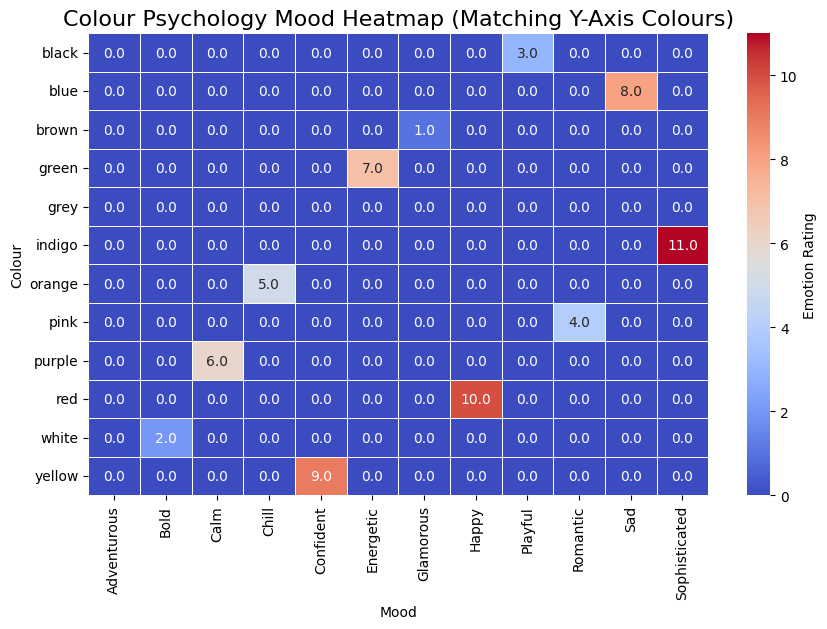

In [238]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the dataset (replace with the actual file path)
colour_psychology_data = pd.read_csv('Colour_psychology_mood.csv')

# Subset the first 12 rows of the dataset
subset_data = colour_psychology_data.head(12)

# Clean the data if necessary (e.g., drop missing values)
subset_data = subset_data.dropna()  # Drop rows with missing values, if necessary

# Map the Emotion strings to numerical values (e.g., using a dictionary)
emotion_mapping = {
	"Passion, Energy": 10, "Calm, Trustworthy": 8, "Happiness, Optimism": 9,
	"Balance, Growth": 7, "Luxury, Creativity": 6, "Warmth, Enthusiasm": 5,
	"Compassion, Love": 4, "Power, Sophistication": 3, "Purity, Peace": 2,
	"Stability, Comfort": 1, "Neutrality, Calm": 0, "Intuition, Wisdom": 11
}

# Add a new column with numerical values for Emotion
subset_data['Emotion_Numeric'] = subset_data['Emotion'].map(emotion_mapping)

# Pivot the subset to create a matrix with Colour as rows, Mood as columns, and Emotion_Numeric as values
heatmap_data = subset_data.pivot_table(index='Color', columns='Mood', values='Emotion_Numeric', aggfunc='mean')

# Fill missing values (e.g., with a neutral value like 0 or NaN for an empty look)
heatmap_data = heatmap_data.fillna(0)  # You can change this to another value if preferred

# Create a dictionary mapping each Colour to its corresponding actual colour
colour_dict = {
    'Yellow': 'yellow',
    'White': 'white',
    'Red': 'red',
    'Purple': 'purple',
    'Pink': 'pink',
    'Orange': 'orange',
    'Indigo': 'indigo',
    'Grey': 'grey',
    'Green': 'green',
    'Brown': 'brown',
    'Blue': 'blue',
    'Black': 'black'
}

# Apply the dictionary to colour the Y-axis labels
colour_map = heatmap_data.index.map(colour_dict)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', linewidths=0.5, cmap='coolwarm', cbar_kws={'label': 'Emotion Rating'}, yticklabels=colour_map)

# Add labels and title
plt.title('Colour Psychology Mood Heatmap (Matching Y-Axis Colours)', fontsize=16)
plt.xlabel('Mood')
plt.ylabel('Colour')
plt.show()


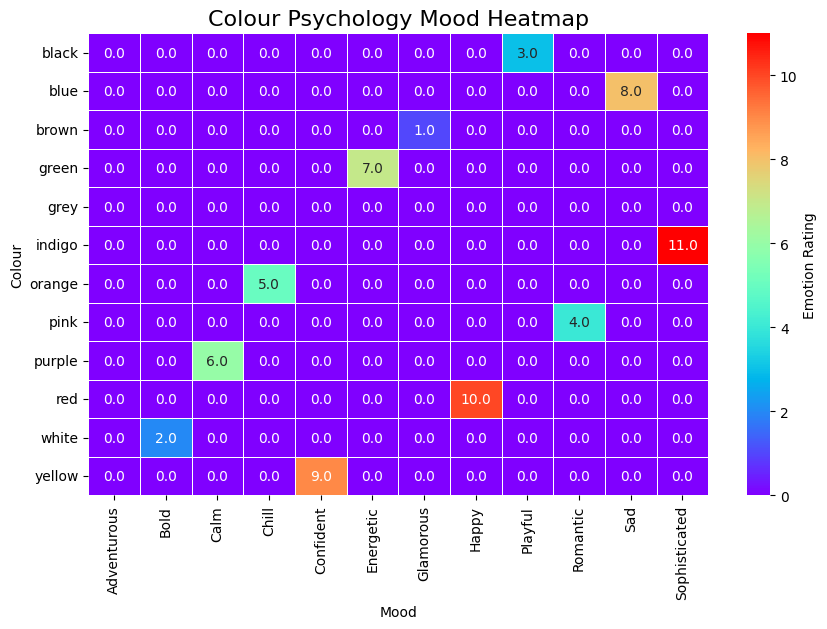

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load the dataset (replace with the actual file path)
colour_psychology_data = pd.read_csv('Colour_psychology_mood.csv')

# Subset the first 12 rows of the dataset
subset_data = colour_psychology_data.head(12)

# Clean the data if necessary (e.g., drop missing values)
subset_data = subset_data.dropna()  # Drop rows with missing values, if necessary

# Map the Emotion strings to numerical values (e.g., using a dictionary)
emotion_mapping = {
	"Passion, Energy": 10, "Calm, Trustworthy": 8, "Happiness, Optimism": 9,
	"Balance, Growth": 7, "Luxury, Creativity": 6, "Warmth, Enthusiasm": 5,
	"Compassion, Love": 4, "Power, Sophistication": 3, "Purity, Peace": 2,
	"Stability, Comfort": 1, "Neutrality, Calm": 0, "Intuition, Wisdom": 11
}

# Add a new column with numerical values for Emotion
subset_data['Emotion_Numeric'] = subset_data['Emotion'].map(emotion_mapping)

# Pivot the subset to create a matrix with Colour as rows, Mood as columns, and Emotion_Numeric as values
heatmap_data = subset_data.pivot_table(index='Color', columns='Mood', values='Emotion_Numeric', aggfunc='mean')

# Fill missing values with black (e.g., NaN filled as black)
heatmap_data = heatmap_data.fillna(0)  # Fill missing values with 0, corresponding to black in the heatmap

# Create a dictionary mapping each Colour to its corresponding actual colour
colour_dict = {
    'Yellow': 'yellow',
    'White': 'white',
    'Red': 'red',
    'Purple': 'purple',
    'Pink': 'pink',
    'Orange': 'orange',
    'Indigo': 'indigo',
    'Grey': 'grey',
    'Green': 'green',
    'Brown': 'brown',
    'Blue': 'blue',
    'Black': 'black'
}

# Apply the dictionary to colour the Y-axis labels with actual colours
colour_map = heatmap_data.index.map(colour_dict)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', linewidths=0.5, cmap='rainbow', cbar_kws={'label': 'Emotion Rating'}, yticklabels=colour_map)

# Add labels and title
plt.title('Colour Psychology Mood Heatmap', fontsize=16)
plt.xlabel('Mood')
plt.ylabel('Colour')
plt.show()


In [4]:
import pandas as pd
df = pd.read_csv("Colour_psychology_mood.csv")
print(df.head())


    Color Hex Code              Emotion         Fashion Trend  \
0     Red  #FF0000      Passion, Energy          Bold Fashion   
1    Blue  #0000FF    Calm, Trustworthy           Casual Chic   
2  Yellow  #FFFF00  Happiness, Optimism          Summer Vibes   
3   Green  #00FF00      Balance, Growth  Eco-friendly Fashion   
4  Purple  #800080   Luxury, Creativity  Elegant Evening Wear   

    Mood description           Icon       Mood  
0     Fiery, Intense       Iris Law      Happy  
1  Relaxed, Peaceful  Meghan Markle        Sad  
2     Bright, Joyful        Beyonce  Confident  
3     Fresh, Restful    Emma Watson  Energetic  
4    Regal, Creative        Zendaya       Calm  


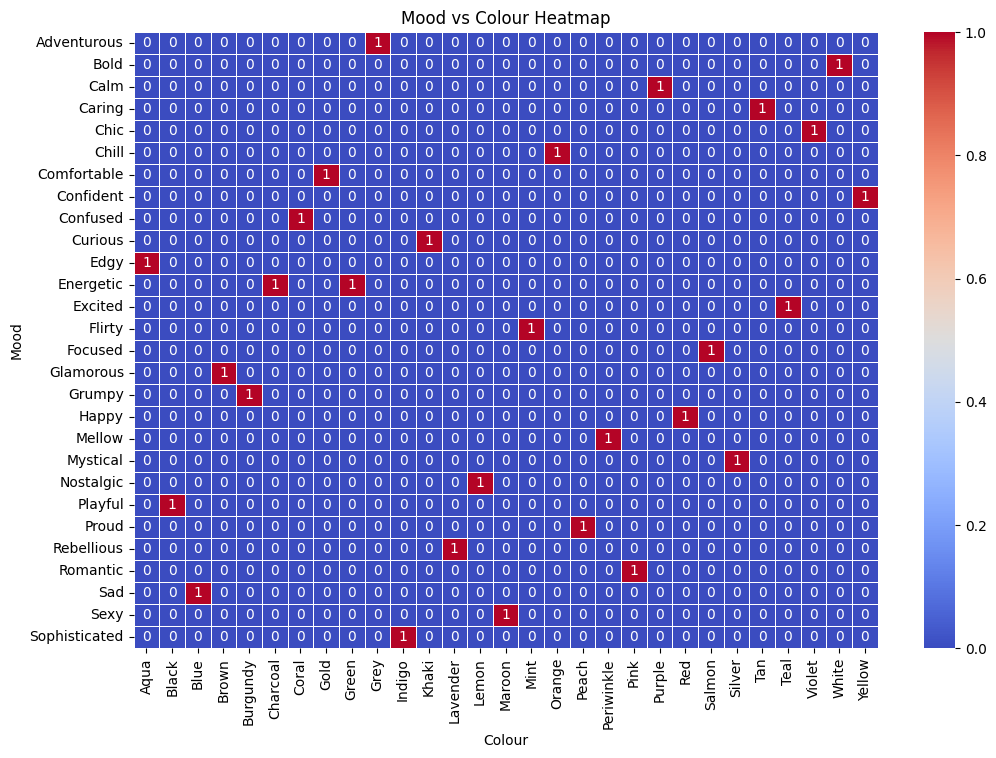

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data for heatmap - here we'll create a pivot table
pivot_df = df.pivot_table(index='Mood', columns='Color', values='Mood description', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mood vs Colour Heatmap")
plt.ylabel("Mood")
plt.xlabel("Colour")
plt.show()


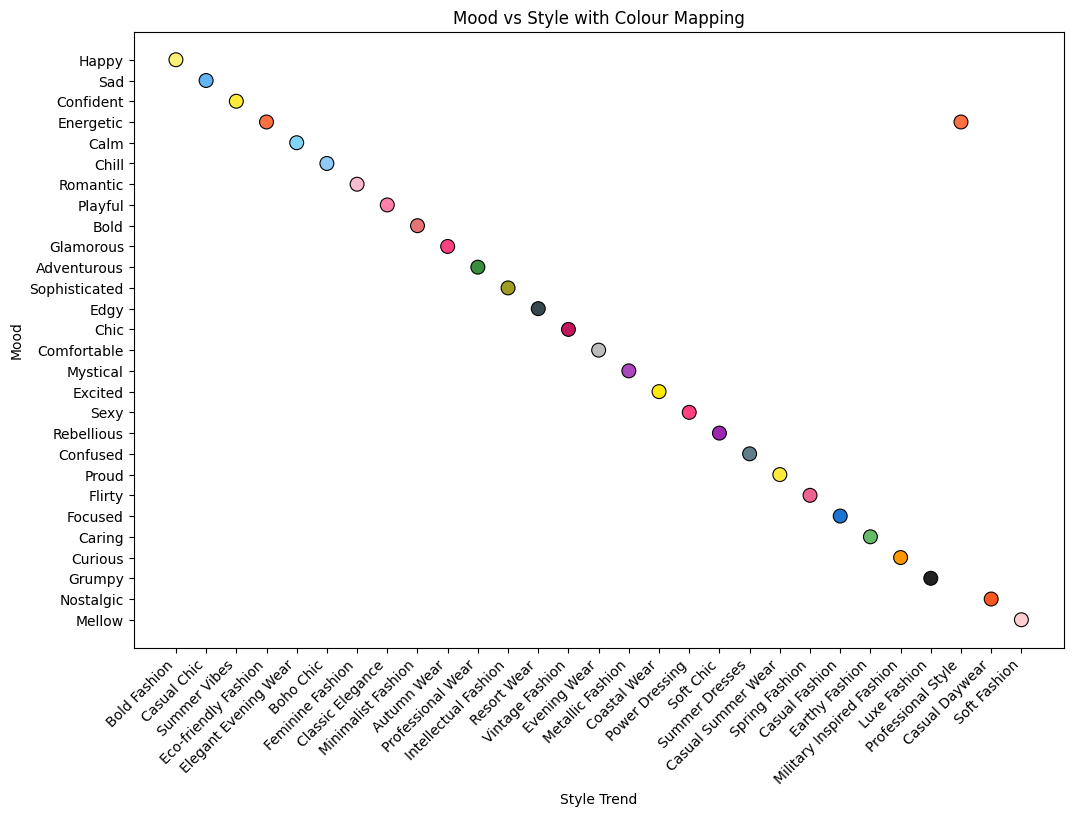

In [16]:
# Create a palette dictionary based on the unique values in the Colour column
unique_colours = df['Colour'].unique()
colour_palette = {colour: colour for colour in unique_colours}

# Plot using the custom colour palette
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Fashion Trend', y='Mood', hue='Colour', palette=colour_palette, s=100, edgecolor='black', legend=None)

# Adjust the size of the x-axis labels
plt.title("Mood vs Style with Colour Mapping")
plt.xlabel("Style Trend")
plt.ylabel("Mood")
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust the rotation and font size here
plt.show()

